In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

## All Rules
Asites=1, Bsites=100, nsteps=350, nsim=1000, id=255-i 1-254

Asites=4, Bsites=100, nsteps=350, nsim=1000, id=1000+i 1-254

3.703354240208593


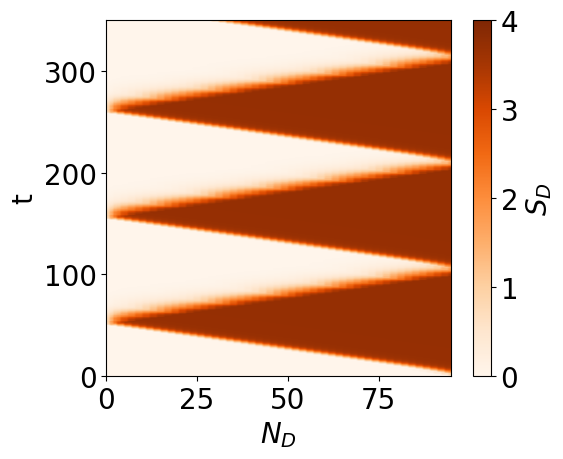

In [137]:
# file_idx = 255-184
file_idx = 1000+26
file_name = "../data/240611/240611_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr.T[-1:0:-1,:],aspect="auto",cmap="Oranges",extent=[0,nmeas_l[-1],0,nstep_l[-1]],vmin=0,vmax=4)
cbar = plt.colorbar()
cbar.ax.set_ylabel("$S_D$")
plt.xlabel("$N_D$")
plt.ylabel("t")
print(np.max(S_ave_arr))
plt.tight_layout()

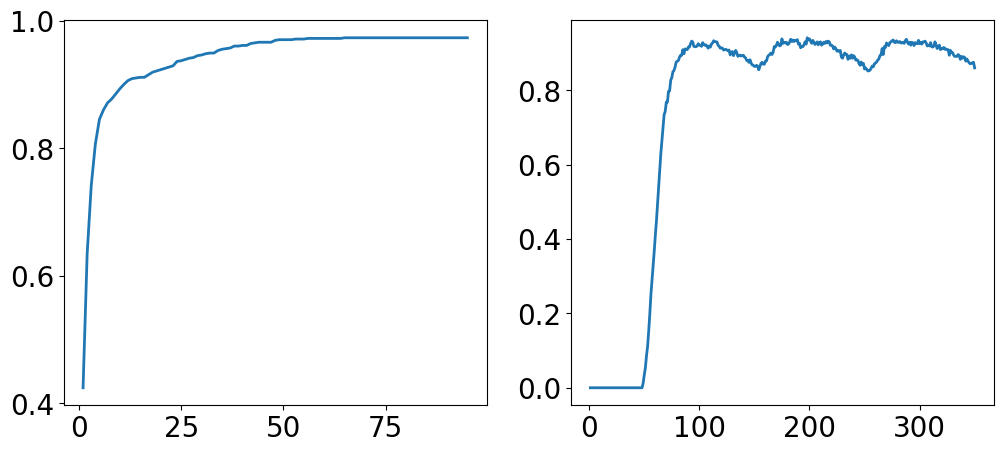

In [96]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
# plt.plot(nmeas_l, S_ave_arr[:,-1],'*')
plt.plot(nmeas_l,S_ave_arr[:,-1])

plt.subplot(1,2,2)
plt.plot(nstep_l, S_ave_arr[5,:])

publication plot

Text(0, 0.5, '$S_D$')

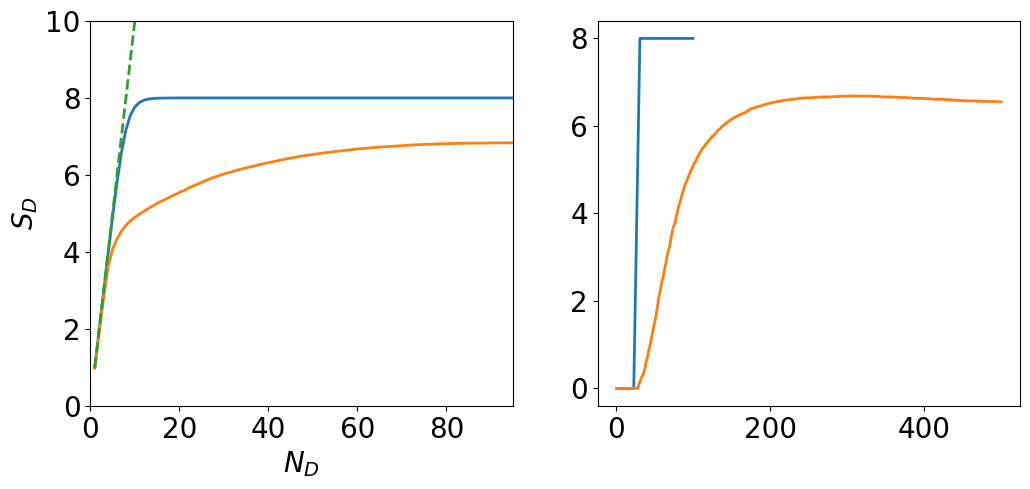

In [104]:
plt.figure(figsize=(12,5))
nAsites = 8
file_idx = 0+nAsites
file_name = "../data/240611/240611_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(nmeas_l),len(nstep_l)))

plt.subplot(1,2,1)
plt.plot(nmeas_l, S_ave_arr[:,-1])
# plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(nstep_l, S_ave_arr[50,:],)

nAsites = 8
file_idx = 10+nAsites
file_name = "../data/240611/240611_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(nmeas_l),len(nstep_l)))

plt.subplot(1,2,1)
plt.plot(nmeas_l, S_ave_arr[:,-1])
# plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(nstep_l, S_ave_arr[50,:],)

plt.subplot(1,2,1)
plt.plot(nmeas_l,nmeas_l,"--")
plt.xlim([0,nmeas_l[-1]])
plt.ylim([0,10])
plt.xlabel("$N_D$")
plt.ylabel("$S_D$")

Text(0, 0.5, 'max $S_D$')

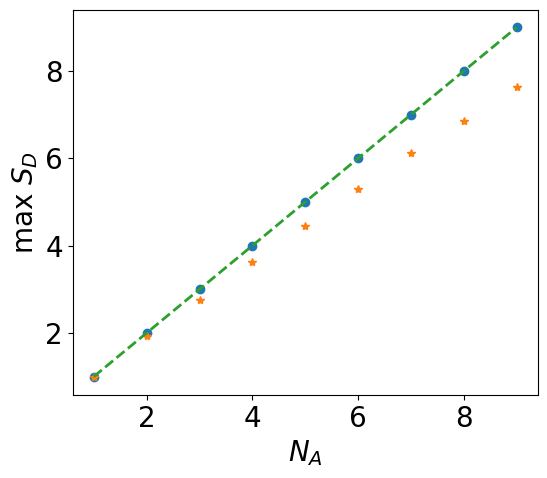

In [98]:
plt.figure(figsize=(6,5))

nAsites_l = np.arange(1,10)
max_S_l = []
for nAsites in nAsites_l:
    file_idx = 0+nAsites
    file_name = "../data/240611/240611_%d"%(file_idx)
    nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(nmeas_l),len(nstep_l)))
    max_S_l.append(np.max(S_ave_arr))

plt.plot(nAsites_l,max_S_l,'o')

nAsites_l = np.arange(1,10)
max_S_l = []
for nAsites in nAsites_l:
    file_idx = 10+nAsites
    file_name = "../data/240611/240611_%d"%(file_idx)
    nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(nmeas_l),len(nstep_l)))
    max_S_l.append(np.max(S_ave_arr))

plt.plot(nAsites_l,max_S_l,'*')


plt.plot(nAsites_l,nAsites_l,'--')
plt.xlabel("$N_A$")
plt.ylabel("max $S_D$")

find all nonlocal collision

In [3]:
full_recovery_l = []

for i in range(1,255):
    # file_idx = 255-i
    file_idx = 1000+i
    file_name = "../data/240611/240611_%d"%(file_idx)
    nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

    if np.max(S_ave_arr[:,150:]) > 4-1e-5:
        full_recovery_l.append(i)

nonlocal_collision_right_l = []
nonlocal_collision_left_l = []

for i in range(0,253):
    rule_bin = format(i, '#010b')[2:]
    c00 = ((rule_bin[0]=='1') ^ (rule_bin[4]=='1'))
    c01 = ((rule_bin[1]=='1') ^ (rule_bin[5]=='1'))
    c10 = ((rule_bin[2]=='1') ^ (rule_bin[6]=='1'))
    c11 = ((rule_bin[3]=='1') ^ (rule_bin[7]=='1'))
    if c00 and c01 and c10 and c11:
        nonlocal_collision_right_l.append(i)

    # rule_bin = rule_bin[::-1]
    # c00 = ((rule_bin[0]=='1') ^ (rule_bin[4]=='1'))
    # c01 = ((rule_bin[1]=='1') ^ (rule_bin[5]=='1'))
    # c10 = ((rule_bin[2]=='1') ^ (rule_bin[6]=='1'))
    # c11 = ((rule_bin[3]=='1') ^ (rule_bin[7]=='1'))
    # if c00 and c01 and c10 and c11:
    #     nonlocal_collision_left_l.append(i)

    d00 = ((rule_bin[0]=='1') ^ (rule_bin[1]=='1'))
    d01 = ((rule_bin[2]=='1') ^ (rule_bin[3]=='1'))
    d10 = ((rule_bin[4]=='1') ^ (rule_bin[5]=='1'))
    d11 = ((rule_bin[6]=='1') ^ (rule_bin[7]=='1'))
    if d00 and d01 and d10 and d11:
        nonlocal_collision_left_l.append(i)

In [160]:
rule_bin

'00111111'

In [163]:
print(nonlocal_collision_right_l)
print(nonlocal_collision_left_l)

[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240]
[85, 86, 89, 90, 101, 102, 105, 106, 149, 150, 153, 154, 165, 166, 169, 170]


In [5]:
print(full_recovery_l)

[15, 30, 45, 60, 75, 85, 86, 89, 90, 101, 102, 105, 106, 120, 135, 149, 150, 153, 154, 165, 166, 169, 170, 180, 195, 210, 225, 240]


## All Rules OTOC

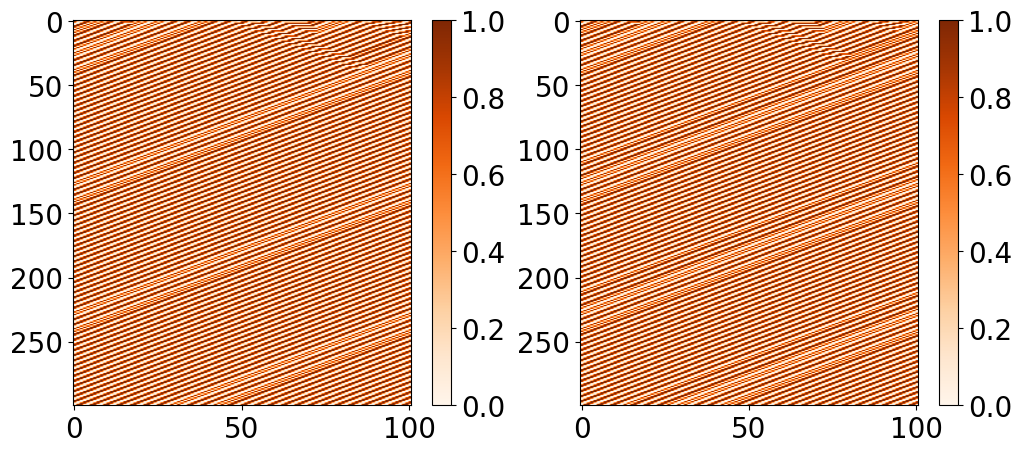

In [133]:
# fixed
# ruleID = 37
# file_name = "../data/240611/rule%d_OTOC2"%(ruleID)
# periodic
ruleID = 43
file_name = "../data/240611/rule%d_OTOC5"%(ruleID)
sites_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
traj0 = raw[:,0].reshape((len(nstep_l),len(sites_l)))
traj1 = raw[:,1].reshape((len(nstep_l),len(sites_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(traj0,aspect="auto",cmap="Oranges")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(traj1,aspect="auto",cmap="Oranges")
plt.colorbar()

Text(0, 0.5, 't')

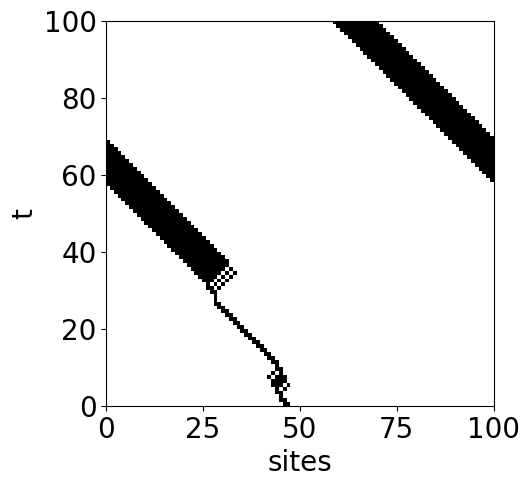

In [134]:
OTOC = (traj0.astype(bool) ^ traj1.astype(bool))
OTOC = OTOC.astype(int)
plt.figure(figsize=(5,5))
plt.imshow(np.roll(OTOC[:,:],250,1)[100:0:-1,:],aspect="auto",cmap="Greys",extent=[0,100,0,100])
plt.xlabel("sites")
plt.ylabel("t")


## Rule 60 MIPT
Asites=1,Bsites=100*i,nsteps=3.5*Bsites, pertb=0.:0.3:0.01, 2001-2004

Asites=1,Bsites=100*i,nsteps=3.*Bsites, pertb=0.:0.3:0.01, 2011-2014

0.23


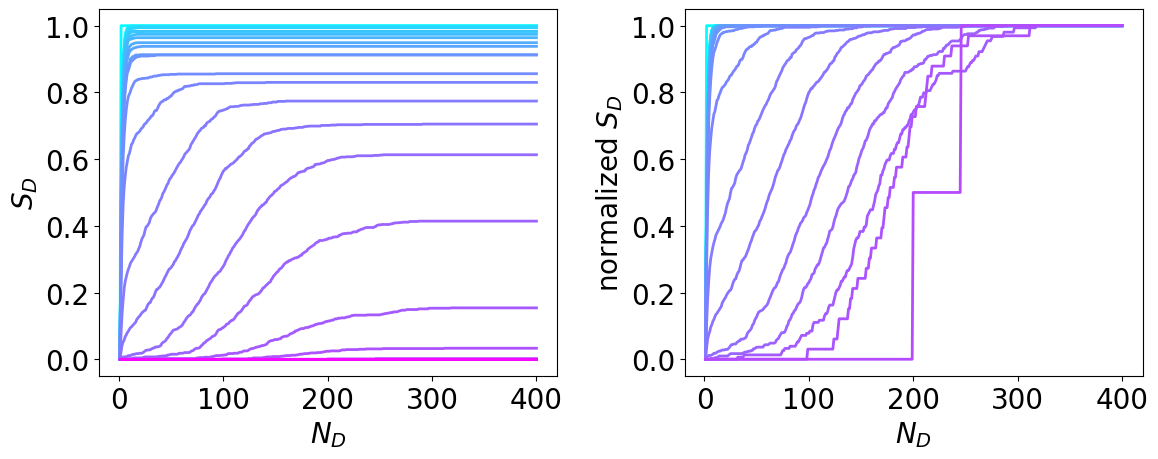

In [122]:
file_idx = 2014
file_name = "../data/240611/240611_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
cmap = mpl.colormaps['cool']

# plt.xlim([0,100])
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")

plt.subplot(1,2,2)
for pertb_idx in range(0,len(pertb_l),1):
    if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]),c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("$N_D$")
    plt.ylabel("normalized $S_D$")

plt.tight_layout()

0.27


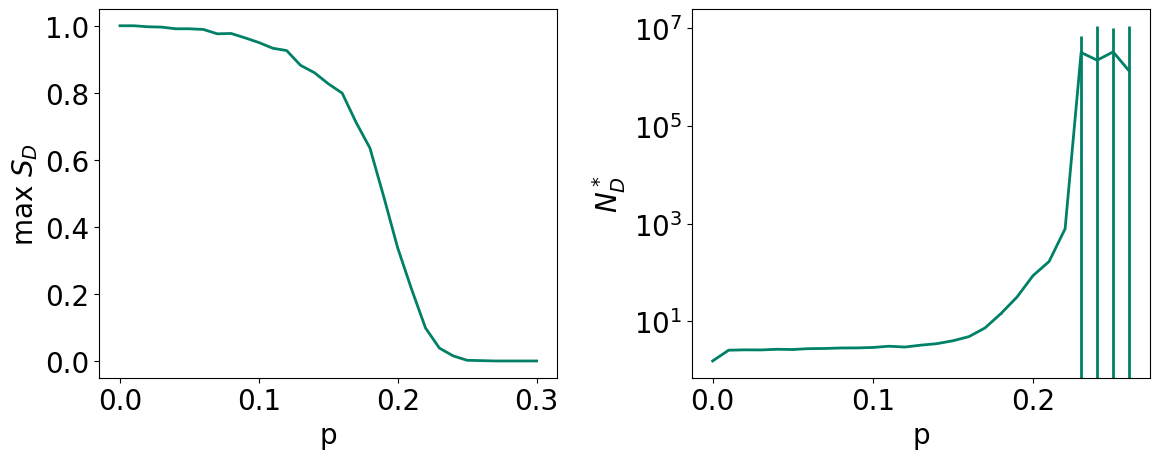

In [120]:
plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
# nAsites = 5
# file_idx_l = (2000)+np.array([1,2,3,4])
file_idx_l = (2000)+np.array([1])

for nB_idx,file_idx in enumerate(file_idx_l):
    file_name = "../data/240611/240611_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
    S_snd_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))
    S_trd_arr = raw[:,2].reshape((len(pertb_l),len(nmeas_l)))
    S_fth_arr = raw[:,3].reshape((len(pertb_l),len(nmeas_l)))

    def fit_exp(x,x0,A):
        return A*(1-np.exp(-x/x0))

    meas0_l = []
    meas0_std_l = []
    pertb_upper_idx = 220
    for pertb_idx in range(0,pertb_upper_idx ,1):
        if np.average(S_ave_arr[pertb_idx,-10:]) <= 1e-3:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l.append(popt[0])
        meas0_std_l.append(np.sqrt(pcov[0,0]))
    
    meas0_l = np.array(meas0_l)
    meas0_std_l = np.array(meas0_std_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    # plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
    plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    plt.yscale('log')
    # plt.xlim([0,0.25])
    # plt.ylim([0,10])
    
plt.tight_layout()